In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#数据格式化

datafile = open('Fe-log.lammps', 'r', encoding='utf-8')
datas = datafile.readlines()
#print(type(datas))
datalist = []
for i in range(len(datas)-1):
    datas[i] = ' '.join(datas[i].split())
    datalist.append(datas[i])

#print(datalist)
    
datafile.close()



datafile = open('Fe-log.txt', 'w')

data = '\n'.join(datalist)

datafile.write(data)

datafile.close()


In [31]:
contents = pd.read_csv('Fe-log.txt', sep=' ')

star = int(input("起始行数："))

end = int(input("结束行数："))

contents = contents.iloc[star: end+1, :]

#contents = contents.drop(0)

contents.head()

起始行数：9800
结束行数：9900


,Step,Temp,PotEng,c_msd_all[4],v_twopoint_all,v_fitslope_all
9800,9800000,297.08189,-16330.315,0.028068,4.773540e-07,-0.000011
9801,9801000,302.78827,-16326.671,0.028115,4.780898e-07,-0.000014
9802,9802000,291.44782,-16328.901,0.028764,4.890828e-07,-0.000020
9803,9803000,302.51082,-16326.815,0.027675,4.705267e-07,-0.000036
9804,9804000,293.81254,-16327.163,0.028967,4.924268e-07,-0.000157


In [32]:
Step = contents['Step']/1000

Temp = contents['Temp']

PE = contents['PotEng']

msd_Fe = contents['c_msd_all[4]']

v_twopoint_Fe = contents['v_twopoint_all']

v_fitslope_Fe = contents['v_fitslope_all']

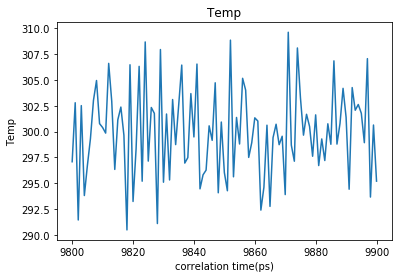

In [33]:
# Temp
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("Temp")
plt.plot(Step, Temp)
plt.title('Temp')

plt.show()

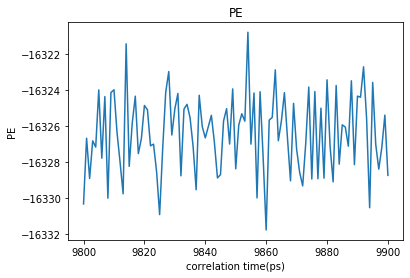

In [34]:
# Temp
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("PE")
plt.plot(Step, PE)
plt.title('PE')

plt.show()

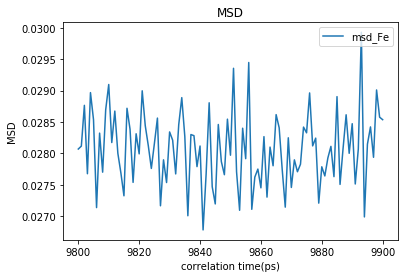

In [35]:
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("MSD")
plt.plot(Step, msd_Fe, label='msd_Fe')
plt.legend(loc="upper right")
plt.title('MSD')

plt.show()

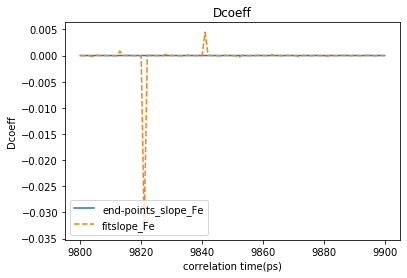

In [36]:
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("Dcoeff")
plt.plot(Step, v_twopoint_Fe, linestyle='-', label='end-points_slope_Fe')
plt.plot(Step, v_fitslope_Fe, linestyle='--', label='fitslope_Fe')
plt.legend(loc="lower left")
plt.title('Dcoeff')

plt.show()